In [1]:
!git clone https://github.com/bwa2116/forexperiment.git

Cloning into 'forexperiment'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 159 (delta 0), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (159/159), 56.38 KiB | 6.26 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [2]:
cd /content/forexperiment

/content/forexperiment


In [3]:
from ViT.model import ViTForClassfication

import torch
from torch import nn, optim

import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
from ViT.config import data_config
from datasets.loader import load_data
from trainer import Trainer

In [6]:
torch.cuda.empty_cache()
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
for data in ["MNIST"]:  # , 'CIFAR10', 'Places365', 'ImageNet200'
    config = data_config[data]

    # These are not hard constraints, but are used to prevent misconfigurations
    assert config["hidden_size"] % config["num_attention_heads"] == 0
    assert config["intermediate_size"] == 4 * config["hidden_size"]
    assert config["image_size"] % config["patch_size"] == 0

    img_size = (config["image_size"], config["image_size"])
    batch_size = 64  # 256

    trainloader, testloader, _ = load_data(
        name=config["name"], img_size=img_size, batch_size=batch_size
    )

    epochs = 1  # 100
    lr = 1e-4
    save_model_every = 0  # 10

    save_model_every_n_epochs = save_model_every

    loss_fn = nn.CrossEntropyLoss()

    for randomfeatures in [False, True]:
        if randomfeatures:
            attention_type = "Performer-Softmax"
            m_range = [16] # , 32, 64, 128

            for m in m_range:
                exp_name = (
                    data + "_" + attention_type + "_with" + "_" + str(m)
                    + "_" + "random features"
                )

                print(f"This is experiment {exp_name}")

                model = ViTForClassfication(
                    config, perfrelu=perfrelu,
                    randomfeatures=randomfeatures, m=m
                )

                optimizer = optim.AdamW(model.parameters(),
                                        lr=lr, weight_decay=1e-2)

                trainer = Trainer(
                    model=model,
                    config=config,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    exp_name=exp_name,
                    device=device,
                )

                trainer.train(
                    trainloader,
                    testloader,
                    epochs,
                    save_model_every_n_epochs=save_model_every_n_epochs,
                )

        else:
            m = 1  # dummy variable
            for perfrelu in [False, True]:
                if perfrelu:
                    attention_type = "Performer-ReLU"
                else:
                    attention_type = "Transformer"

                exp_name = data + "_" + attention_type
                print(f"This is experiment {exp_name}")

                model = ViTForClassfication(
                    config, perfrelu=perfrelu,
                    randomfeatures=randomfeatures, m=m
                )

                optimizer = optim.AdamW(model.parameters(),
                                        lr=lr, weight_decay=1e-2)

                trainer = Trainer(
                    model=model,
                    config=config,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    exp_name=exp_name,
                    device=device,
                )

                trainer.train(
                    trainloader,
                    testloader,
                    epochs,
                    save_model_every_n_epochs=save_model_every_n_epochs,
                )

'''
output:
1. Transformer
2. Performer-ReLU
3. Performer Softmax with random feature 16
4. Performer Softmax with random feature 32
5. Performer Softmax with random feature 64
6. Performer Softmax with random feature 128
'''
# function (from utils) to write results to text file
# function (from utils) to generate plots
# function (from utils) to save text files and plots to Drive


100%|██████████| 9912422/9912422 [00:00<00:00, 287303650.36it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 21118496.13it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 89003029.40it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8795257.97it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

This is experiment MNIST_Transformer
Starting Epoch 1 of 1.


  0%|          | 0/938 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 938/938 [00:38<00:00, 24.31batch/s]


Epoch: 1, Train loss: 1.8760, Test loss: 1.6020, Accuracy: 0.3210
This is experiment MNIST_Performer-ReLU
Starting Epoch 1 of 1.


100%|██████████| 938/938 [00:34<00:00, 26.94batch/s]


Epoch: 1, Train loss: 1.6453, Test loss: 1.2064, Accuracy: 0.5218
This is experiment MNIST_Performer-Softmax_with_16_random features
Starting Epoch 1 of 1.


100%|██████████| 938/938 [01:21<00:00, 11.51batch/s]


Epoch: 1, Train loss: 1.7837, Test loss: 1.4905, Accuracy: 0.4010


'\noutput:\n1. Transformer\n2. Performer-ReLU\n3. Performer Softmax with random feature 16\n4. Performer Softmax with random feature 32\n5. Performer Softmax with random feature 64\n6. Performer Softmax with random feature 128\n'

# Inspect

In [ ]:
from ViT.utils import visualize_images, visualize_attention, load_experiment

100%|██████████| 9912422/9912422 [00:00<00:00, 192074653.71it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 27969451.36it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 87414573.49it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4749570.87it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



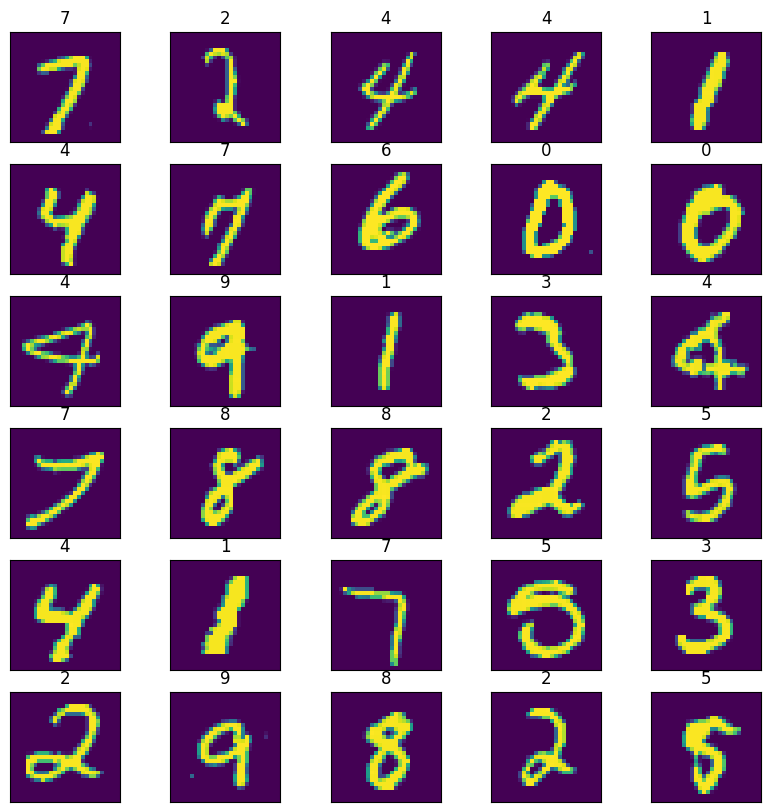

In [ ]:
visualize_images('MNIST') # Show some training images

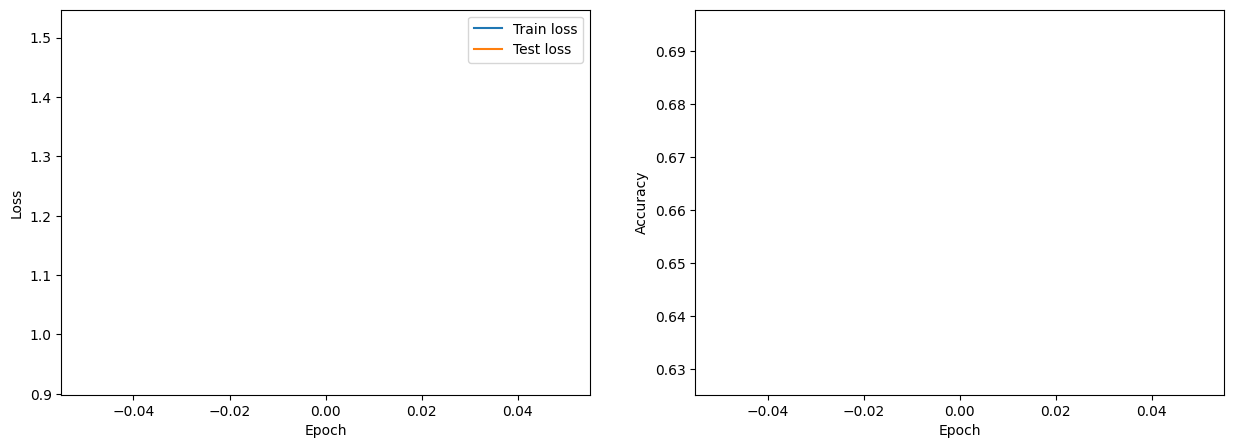

In [ ]:
# Load Experiment
config, model, train_losses, test_losses, accuracies = load_experiment("vit-with-20-epochs")

# Create two subplots of train/test losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(train_losses, label="Train loss")
ax1.plot(test_losses, label="Test loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax2.plot(accuracies)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
plt.savefig("metrics.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:153: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


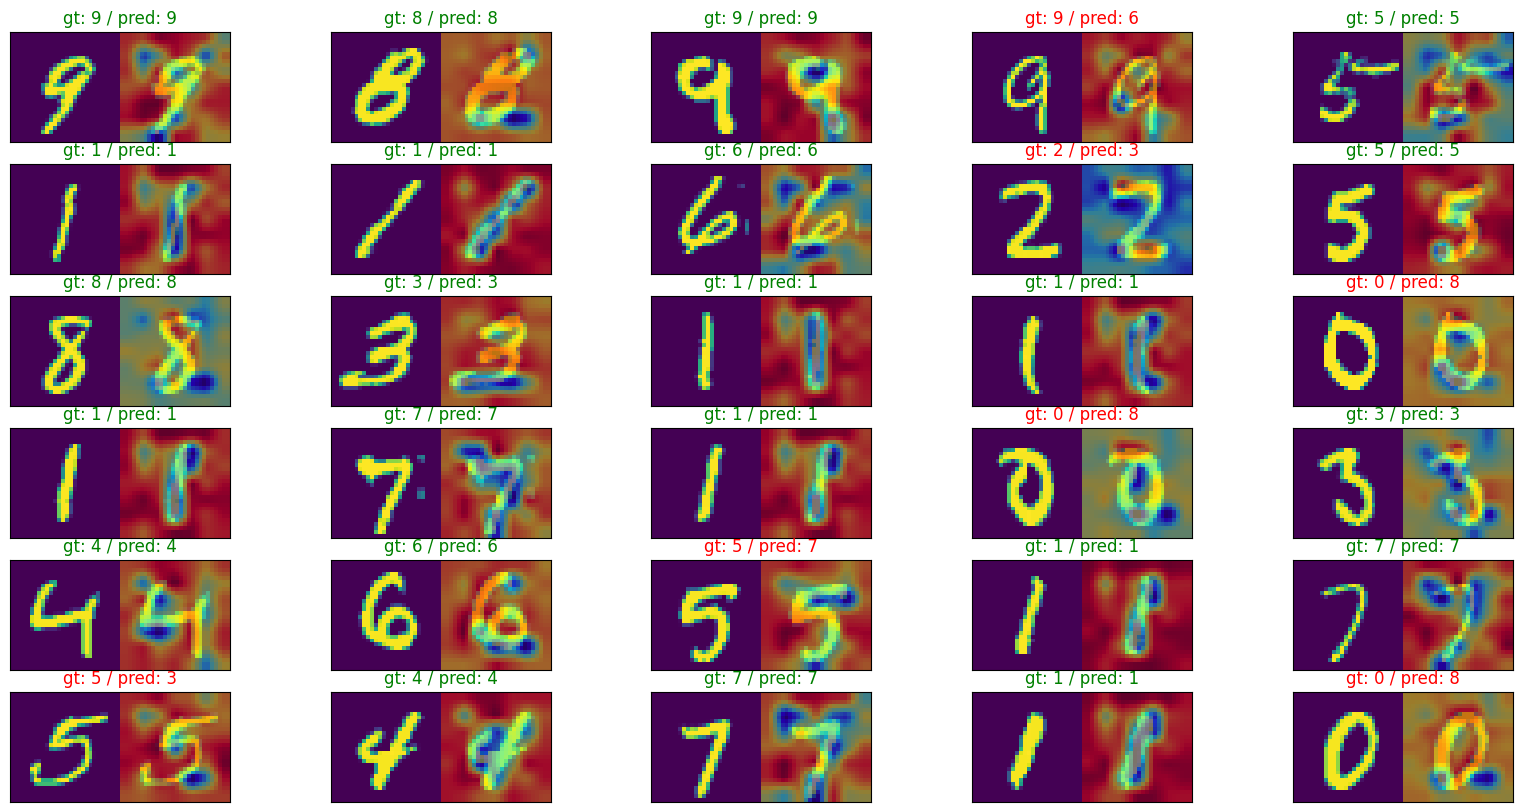

In [ ]:
visualize_attention(model,'MNIST', "attention.png")